<a href="https://colab.research.google.com/github/tramlam-ng/Predict_Housing_Price_using_ML_algorithms/blob/main/California_Housing_Price_Prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Libraries and Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)  
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()

## Dataset Stucture

In [ ]:
#briefly view the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- First Overview:
    - Each value represents one district.
    - There are ten attributes.
    - total_bedrooms has only 20.433 nonnull values, meaning that 207 districts are missing this feature.
    - All attributes are numerical, except the ocean_proximity field.

- Next let's take a look at a histogram for each numerical attribute. You can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.

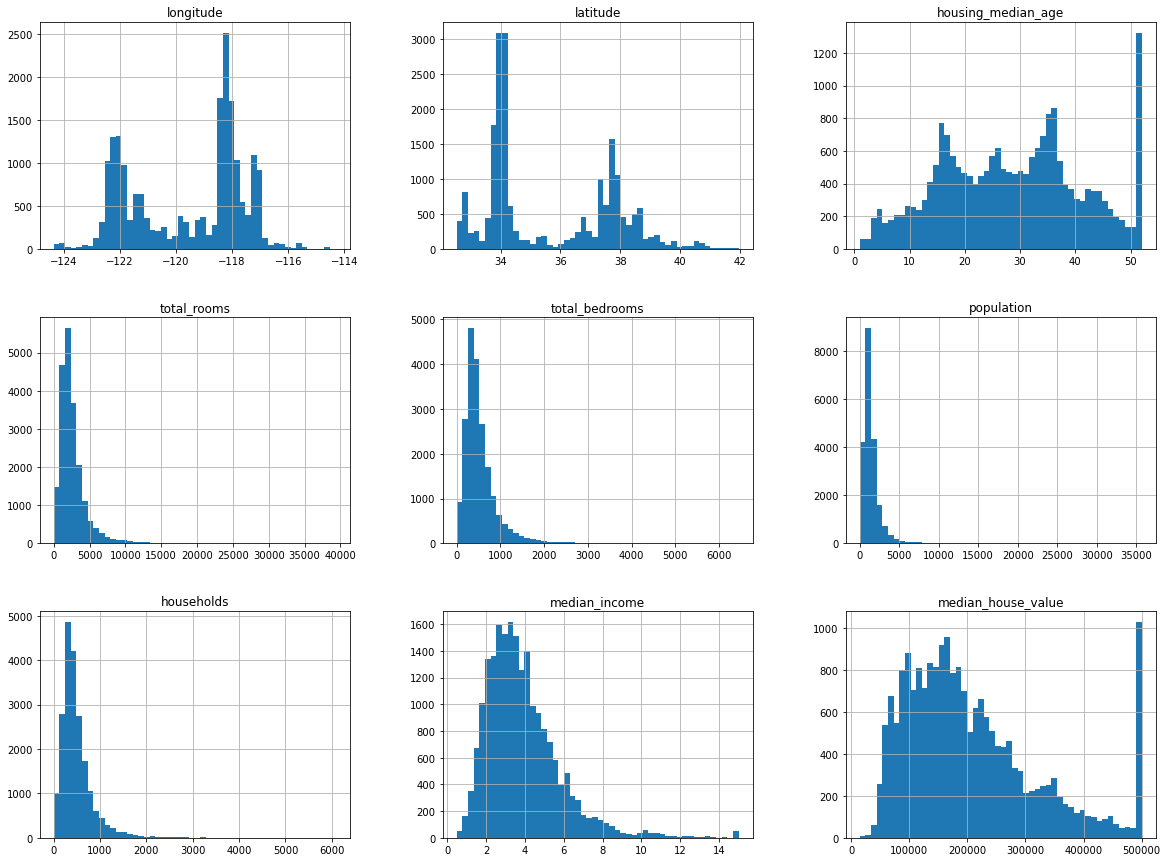

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

- There are a few things to notice in these histograms:
    - Median income is measured in tens of thousands of US Dollars
    - Due to outliers. There should be a high numbers of old houses (around 50 years old) and expensive houses (around 500001k USD)
    - All the attributes have different scales.

- Note: Many histogram are tail-heavy (skewness). This may make it harder for some ML algorithms to detect patterns. We will try transforming these attributes to have more bell-shaped distributions.

In [ ]:
housing.corr().style.background_gradient(cmap='Reds')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
# to find the attribute which is most correlated with median_house_valueb
housing[housing.columns[1:]].corr()['median_house_value'][:].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
latitude             -0.144160
Name: median_house_value, dtype: float64

## Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- But it's not perfect. We might run the risk of introducing a significant sampling-bias. When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. 
 - This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.
- bWe know that median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

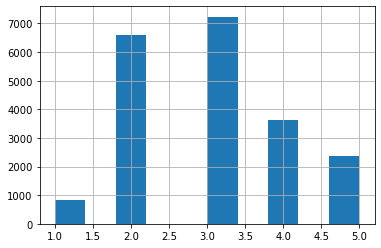

In [ ]:
housing['income_cat'].hist()

In [ ]:
# proportion of income cat per groups
housing['income_cat'].value_counts(normalize=True)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

- Note: stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [ ]:
train_set['income_cat'].value_counts(normalize=True)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [ ]:
test_set['income_cat'].value_counts(normalize=True)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
# remove the income_cat attribute so the data is back to its original state
train_set = train_set.drop("income_cat", axis=1)
test_set = test_set.drop("income_cat", axis=1)

In [ ]:
housing = housing.drop("income_cat", axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Discover and Visualize Data to Gain Insights 

In [ ]:
# create a copy of train set so that i keep the original dataset
housing_1 = train_set.copy()

### Visualize Geographical Data

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure bad_visualization_plot


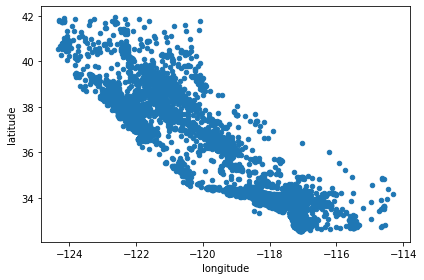

In [ ]:
housing_1.plot(kind='scatter',x='longitude',y='latitude')
save_fig('bad_visualization_plot')

Saving figure bad_visualization_plot


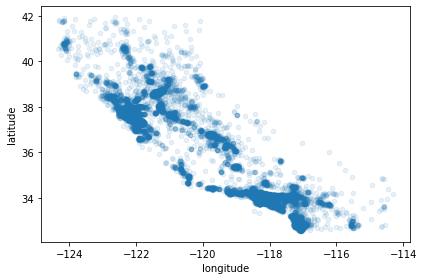

In [ ]:
housing_1.plot(kind='scatter',x='longitude',y='latitude', alpha=0.1)
save_fig('bad_visualization_plot')

Saving figure housing_prices_scatterplot


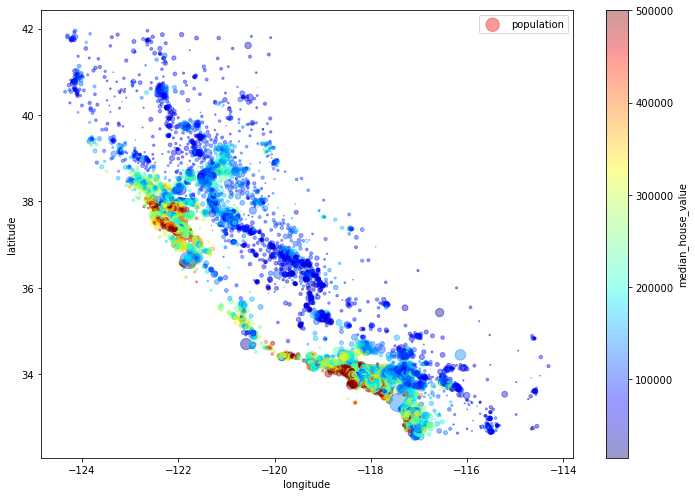

In [ ]:
# color by median_house_value
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [ ]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x7fde835bde80>)

<ipython-input-28-ef573843a5e8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


Saving figure california_housing_prices_plot


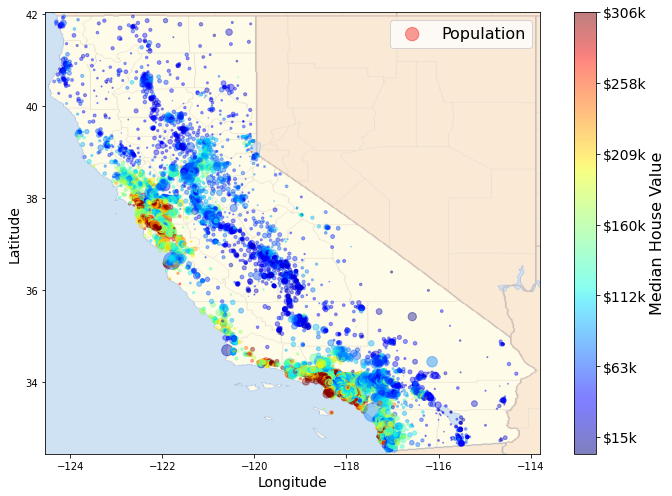

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlation

WARNING: The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”).

In [ ]:
corr_matrix = housing_1.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

- Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 112 = 121 plots, which would not fit on a page—so let’s just focus on a few promising attributes that seem most correlated with the median housing value

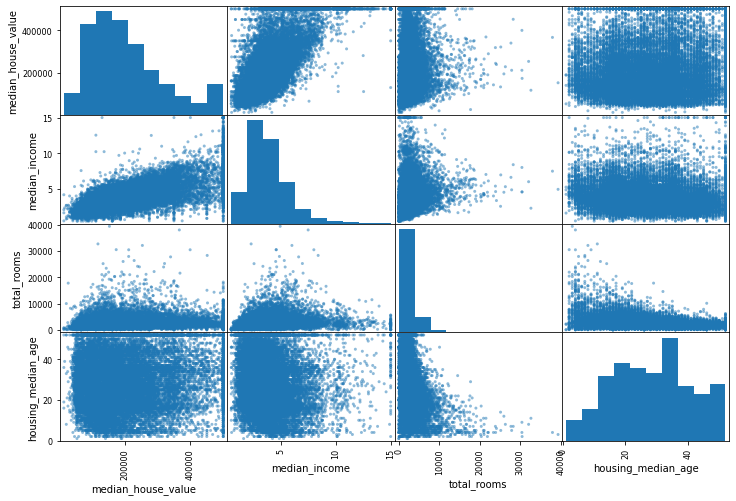

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

plt.show()

- From the chart above, the most promising attribute to predict the median house value is the median income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

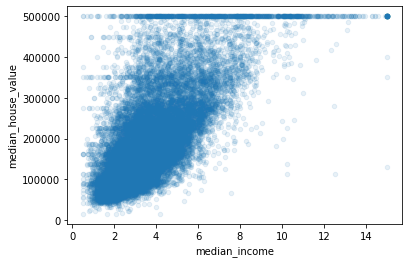

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

- This plot reveals a few things:
    - The correlation is indeed very strong.
    - The price cap is clearly visible as a horizontal line at 500,000USD
    - But this plot reveals other less obvious straight lines: a horizontal line around USD450,000, another around USD350,000

## Experimenting with Attribute Combinations

- There are a few things we could try manipulating the data before training ML algorithms. Example, the number of rooms in a district is not very useful. What we really want is the number of rooms per household. 
- Similiar with the total number of bedrooms, we probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

In [ ]:
housing_1["rooms_per_household"] = housing_1["total_rooms"]/housing_1["households"]
housing_1["bedrooms_per_room"] = housing_1["total_bedrooms"]/housing_1["total_rooms"]
housing_1["population_per_household"]=housing_1["population"]/housing_1["households"]

In [ ]:
corr_matrix = housing_1.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

- Not bad! The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. 
- Apparently houses with a lower bedroom/room ratio tend to be more expensive (notice the negative sign). 
- The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. 
But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

## Prepare Data for ML Algorithms

In [ ]:
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()

### Handling Numerical Features

In [ ]:
# compute and save the median value, so that later on we can replace missing values for the test set and the new data
median = X_train['total_bedrooms'].median()
X_train['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
# numerical attributes of train set
housing_num = X_train.drop('ocean_proximity', axis =1)

- In addition, Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. 
Here is how to use it. First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


# fit the train set
imputer.fit(housing_num)

print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [ ]:
# use the trainded imputer to transform the training set by replacing the missing values with the learned medians
# transform the train set
X_imputer = imputer.transform(housing_num)

# X is returned in a plain Numpy array containing the transformed features, so we need to put back to DataFrame for readability
pd.DataFrame(X_imputer, columns = housing_num.columns, index = housing_num.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### Handling Categorical Features

In [ ]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = X_train[['ocean_proximity']]
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array,21 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
# categories by OneHotEncoder
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder 

ordinal_encoder =OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print(housing_cat[:10])
print(housing_cat_encoded[:10])
print(f"Encoder categories {ordinal_encoder.categories_}")

      ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN
[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
Encoder categories [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### Customer Transformer

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes.

In [ ]:
# create new attributes and add to the datasets
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        
        # concatenate newly created columns to the existing numpy array X
        return np.c_[X, rooms_per_household, population_per_household,
                      bedrooms_per_room]


attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(X_train.values)

In [ ]:
housing_extra_attribs.shape

(16512, 12)

In [ ]:
X_train.shape

(16512, 9)

### Feature Scaling

There are two common ways to get all attributes to have the same scale: min-max scaling(normalization) and standardization.
- Min-Max-Scaling: values are shifted so that they end up ranging from 0 to 1. Scikit-learn provides a transformer called MinMaxScaler for this.
- Standardization: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Standardization does not bound values to a specific range, and is much less affected by outliers. Scikit-learn provides a transformer called StandardScaler for this.

### Transformation Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #impute numerical missing values with median
    ('attr_adder', CombinedAttributesAdder()), # create and add new numerical attributes
    ('std_scaler', StandardScaler())
])

# fit and transform train set with numerical features by num_pipeline
housing_num_tmfed = num_pipeline.fit_transform(housing_num)

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [ ]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(X_train) # fit and transform train set

Tip: Instead of using a transformer, you can specify the string "drop" if you want the columns to be dropped, or you can specify "passthrough" if you want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but you can set the remainder hyperparameter to any transformer (or to "passthrough") if you want these columns to be handled differently.

## Select and Train Model 

- Now using housing_prepared and housing_labels to train model. Remember to use Root Mean Squared Error as your metric
    - housing_2 = train_set.drop("median_house_value", axis=1)
    - housing_prepared = full_pipeline.fit_transform(housing_2) # fit and transform train set
    - housing_labels = train_set["median_house_value"].copy()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()
 #train model on housing_prepared
lr.fit(housing_prepared, y_train)

RMSE = np.sqrt(mean_squared_error(y_train,lr.predict(housing_prepared)))
RMSE

68628.19819848923

**Note**:
- Bear in mind that the median value of housing price is about 206k USD, taken in the fact that the dataset is much skewed with STD of 115kUSD, the 50% IQR of nearly still180k USD. Hence, by simpy using Linear Regression, the result is not as good with RMSE still pretty high (error up to more than **68,628 USD**).

## Using DecisionTreeRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
regressor = DecisionTreeRegressor(criterion='mse').fit(housing_prepared, y_train)
mean_squared_error(y_train, regressor.predict(housing_prepared))

0.0

## Better Evaluation with Cross Validation

- One way to evaluate the Decision Tree model would be to use the train_test_split() function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult, and it would work fairly well.
- A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
tmp = housing.drop("median_house_value", axis=1)
X = full_pipeline.fit_transform(tmp)
y = housing['median_house_value']

In [ ]:
kfold_shuffle = KFold(n_splits=10,shuffle=True, random_state=42)

treeregressor = DecisionTreeRegressor(criterion='mse')

cv_score = -1 * cross_val_score(treeregressor,X,y,cv=kfold_shuffle,scoring='neg_mean_squared_error',n_jobs=-1)


print('MSE score:',list(cv_score))

MSE score: [5084022056.82219, 4745635174.078488, 4543431028.434109, 4963591114.196221, 4667274780.46657, 4567258171.453004, 4476105784.530523, 4359870659.921996, 4654277983.373062, 4678934612.9234495]


In [ ]:
RMSE = np.sqrt(cv_score)
RMSE #returns the array of RMSE for each shuffle

array([71302.32855119, 68888.57070718, 67404.97777193, 70452.75803115,
       68317.45589867, 67581.49281758, 66903.70531242, 66029.31667011,
       68222.26896969, 68402.73834375])

## Using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor(criterion='mse').fit(housing_prepared, y_train)
np.sqrt(mean_squared_error(y_train, RF_regressor.predict(housing_prepared)))

18755.86942247618

In [ ]:
# Using RF_reg and CV_score
from sklearn.ensemble import RandomForestRegressor
kfold_shuffle_3 = KFold(n_splits=3,shuffle=True, random_state=42)

RF_regressor = RandomForestRegressor(criterion='mse')
cv_score_RF = -1 * cross_val_score(RF_regressor,X,y,cv=kfold_shuffle_3,scoring='neg_mean_squared_error',n_jobs=-1)

print('MSE score (RF):',list(cv_score_RF))

MSE score (RF): [2509357742.7973666, 2584130667.3252873, 2502360095.0778565]


In [ ]:
RMSE_RF = np.sqrt(cv_score_RF)
RMSE_RF

array([50093.49002413, 50834.3453516 , 50023.59538336])

- Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

- You should save every model you experiment with so that you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle module or by using the joblib library, which is more efficient at serializing large NumPy arrays (you can install this library using pip):

## Fine_Tune model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.

### GridSearchCV

- One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.
    - Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30],
              'max_features':[2,4,6,8]}]

forest_reg = RandomForestRegressor(bootstrap=False)

grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error',
                          return_train_score=True,n_jobs=-1)

grid_search.fit(housing_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(bootstrap=False), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62672.7091440106 {'max_features': 2, 'n_estimators': 3}
54381.9786760994 {'max_features': 2, 'n_estimators': 10}
51827.05135604873 {'max_features': 2, 'n_estimators': 30}
59100.43261220318 {'max_features': 4, 'n_estimators': 3}
51702.0984608382 {'max_features': 4, 'n_estimators': 10}
49591.79362649186 {'max_features': 4, 'n_estimators': 30}
57598.352542299515 {'max_features': 6, 'n_estimators': 3}
51103.6062998055 {'max_features': 6, 'n_estimators': 10}
49213.300597751455 {'max_features': 6, 'n_estimators': 30}
57356.89511458692 {'max_features': 8, 'n_estimators': 3}
51101.4193466624 {'max_features': 8, 'n_estimators': 10}
49193.640282934226 {'max_features': 8, 'n_estimators': 30}


### Randominzed Search

- The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
    - If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
    - Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs ={
    'n_estimators': randint(low=1,high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg,param_distribs,n_iter=10,cv=5,
                              scoring='neg_mean_squared_error',random_state=42,n_jobs=-1)

rnd_search.fit(housing_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fde688b09d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fde688b0d60>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

62672.7091440106 {'max_features': 2, 'n_estimators': 3}
54381.9786760994 {'max_features': 2, 'n_estimators': 10}
51827.05135604873 {'max_features': 2, 'n_estimators': 30}
59100.43261220318 {'max_features': 4, 'n_estimators': 3}
51702.0984608382 {'max_features': 4, 'n_estimators': 10}
49591.79362649186 {'max_features': 4, 'n_estimators': 30}
57598.352542299515 {'max_features': 6, 'n_estimators': 3}
51103.6062998055 {'max_features': 6, 'n_estimators': 10}
49213.300597751455 {'max_features': 6, 'n_estimators': 30}
57356.89511458692 {'max_features': 8, 'n_estimators': 3}
51101.4193466624 {'max_features': 8, 'n_estimators': 10}
49193.640282934226 {'max_features': 8, 'n_estimators': 30}


In [ ]:
best_randomforest = rnd_search.best_estimator_
best_randomforest

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

### Analyzing the best models and their errors 

You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

print(list(feature_importances))

[0.08041271030831326, 0.07412153889792868, 0.0414799356757967, 0.0170086818925524, 0.016560418900159333, 0.017104929563629648, 0.015919424497012027, 0.33500291110228103, 0.048428808131180084, 0.10646644883653265, 0.07963901418573771, 0.007855737885779321, 0.15242822051438656, 7.544176145709527e-05, 0.002435102640719178, 0.005060675206534351]


In [ ]:
#display the full colmn names of feature_importances
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(full_pipeline.named_transformers_['cat'].categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
print(attributes)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [ ]:
rnd_search.best_estimator_.feature_importances_

array([7.24699052e-02, 6.38080322e-02, 4.27504395e-02, 1.65343807e-02,
       1.56100762e-02, 1.60929106e-02, 1.52149598e-02, 3.45178404e-01,
       5.74445360e-02, 1.08468449e-01, 7.05907498e-02, 8.77441303e-03,
       1.60563229e-01, 6.10403994e-05, 3.08961266e-03, 3.34886200e-03])

In [ ]:
sorted(zip(feature_importances, attributes),reverse=True)

[(0.33500291110228103, 'median_income'),
 (0.15242822051438656, 'INLAND'),
 (0.10646644883653265, 'pop_per_hhold'),
 (0.08041271030831326, 'longitude'),
 (0.07963901418573771, 'bedrooms_per_room'),
 (0.07412153889792868, 'latitude'),
 (0.048428808131180084, 'rooms_per_hhold'),
 (0.0414799356757967, 'housing_median_age'),
 (0.017104929563629648, 'population'),
 (0.0170086818925524, 'total_rooms'),
 (0.016560418900159333, 'total_bedrooms'),
 (0.015919424497012027, 'households'),
 (0.007855737885779321, '<1H OCEAN'),
 (0.005060675206534351, 'NEAR OCEAN'),
 (0.002435102640719178, 'NEAR BAY'),
 (7.544176145709527e-05, 'ISLAND')]

## Evaluate System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   

final_rmse


46853.15902376238

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
       loc=squared_errors.mean(),
       scale = stats.sem(squared_errors)))

array([44910.40212845, 48718.50574138])

Question 1: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
# Remember what we got feature importances already
feature_importances

array([8.04127103e-02, 7.41215389e-02, 4.14799357e-02, 1.70086819e-02,
       1.65604189e-02, 1.71049296e-02, 1.59194245e-02, 3.35002911e-01,
       4.84288081e-02, 1.06466449e-01, 7.96390142e-02, 7.85573789e-03,
       1.52428221e-01, 7.54417615e-05, 2.43510264e-03, 5.06067521e-03])

In [ ]:
def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr),-k)[-k:])

In [ ]:
# top features to be kept
k = 5

top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [ ]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

- Now let's define our TopFeatureSelector class
- Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a RandomForestRegressor). You may be tempted to compute them directly in the TopFeatureSelector's fit() method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TopFeatureSelector (BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y = None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self,X):
        return X[:,self.feature_indices_]

In [ ]:
# The pipeline should have the full pipeline and the top feature selectors you wrote above
#
preparation_and_feature_selection_pipeline = Pipeline([
      ('preparation', full_pipeline),
      ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(X_train)

In [ ]:
#indices of the top k features
housing_prepared_top_k_features[:6]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ],
       [-0.01706767, -1.04556555,  0.08973561, -0.19645314,  1.        ],
       [ 0.49247384, -0.44143679, -0.00419445,  0.2699277 ,  0.        ],
       [-0.69645635, -0.17643487, -0.04800274, -0.19926409,  1.        ]])

In [ ]:
housing_prepared[:3, top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

Question 2: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
# The pipeline should have 
# 1. full_pipeline
# 2. TopFeatureSelector
# 3. A ML model, for example RandomForestRegressor
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1)),
     ])

In [ ]:
prepare_select_and_predict_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attr_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                       

In [ ]:
some_data = X_train.iloc[:4]
some_labels = y_train.iloc[:4]

print("Predictions: ", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels: ", list(some_labels))

Predictions:  [265646.   341091.01 207955.    50110.  ]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0]


- Well, the full pipeline seems to work fine if it can print out 5 predictions for 5 labels

Question 3: So far, we can do gridsearch with a ML model but can we do GridSearch for the whole pipeline, can you make GridSearchCV works with the prepare_select_and_predict_pipeline pipeline ?

In [ ]:
# We should try: 
# the imputer strategy is 'mean', 'median', 'most_frequent'
# select the best k features: from 1 to the number of features
# you can also try to tune other hyperparameters of random forest if you want, for example `max_leaf_nodes`
param_grid = [{
    'preparation__num__imputer__strategy': ['mean'],
    'feature_selection__k': list(range(1,len(feature_importances)+1)),
}]

# GridSearchCV: let have cv =5, verbose =2 so we can see more information, scoring = 'neg_mean_squared_error'
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                               scoring='neg_mean_squared_error',n_jobs=-1, verbose=2,
                               return_train_score=True)
grid_search_prep.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attr_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
          

In [ ]:
# print your best params here
grid_search_prep.best_params_

{'feature_selection__k': 8, 'preparation__num__imputer__strategy': 'mean'}

In [ ]:
# get the RMSE of the 5-fold best model from this grid search
np.sqrt(-grid_search_prep.best_score_)

50199.830580980655

In [ ]:
# get a list of all the names for each of element in the big pipeline by using get_params
for i in prepare_select_and_predict_pipeline.get_params().keys():
    print(i)


memory
steps
verbose
preparation
feature_selection
model
preparation__n_jobs
preparation__remainder
preparation__sparse_threshold
preparation__transformer_weights
preparation__transformers
preparation__verbose
preparation__num
preparation__cat
preparation__num__memory
preparation__num__steps
preparation__num__verbose
preparation__num__imputer
preparation__num__attr_adder
preparation__num__std_scaler
preparation__num__imputer__add_indicator
preparation__num__imputer__copy
preparation__num__imputer__fill_value
preparation__num__imputer__missing_values
preparation__num__imputer__strategy
preparation__num__imputer__verbose
preparation__num__std_scaler__copy
preparation__num__std_scaler__with_mean
preparation__num__std_scaler__with_std
preparation__cat__categories
preparation__cat__drop
preparation__cat__dtype
preparation__cat__handle_unknown
preparation__cat__sparse
feature_selection__feature_importances
feature_selection__k
model__bootstrap
model__ccp_alpha
model__criterion
model__max_dep

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_distribs = [{
    'preparation__num__imputer__strategy': ['mean','median','most_frequent'],
    'model__max_features': list(range(1,len(feature_importances)+1)),
    'model__max_depth': [3,5,7],
    'model__max_leaf_nodes': [3,5,7],
    'model__min_samples_leaf': randint(low=1, high=8),
    'model__n_estimators': randint(low=1, high=200)
}]
rdm_search_prep = RandomizedSearchCV(prepare_select_and_predict_pipeline, param_distribs, n_iter=60, cv=5,verbose=2,
                                     scoring='neg_mean_squared_error',
                                     n_jobs=-1, random_state=42)
rdm_search_prep.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/tramlam/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-6.81082637e+09             nan -5.14363962e+09             nan
             nan             nan             nan -6.73360559e+09
             nan             nan             nan             nan
             nan             nan             nan             nan
 -5.36336831e+09             nan -9.24937950e+09             nan
 -5.88033581e+09             nan             nan -6.71578756e+09
 -6.74020864e+09             nan -5.15512236e+09 -5.16288499e+09
 -6.78706395e+09             nan -5.74452505e+09             nan
             nan             nan             nan -5.50728133e+09
             nan             nan -7.20180933e+09 -5.64071614e+09
 -6.94553542e+09 -4.95557177e+09             nan             nan
             nan -4.95520594e+09 -4.95771579e+09             nan
             nan             nan -6.62051108e+0

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preparation',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('attr_adder',
                                                                                                CombinedAttributesAdder()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                    

In [ ]:
rdm_search_prep.best_params_

{'model__max_depth': 7,
 'model__max_features': 4,
 'model__max_leaf_nodes': 7,
 'model__min_samples_leaf': 2,
 'model__n_estimators': 195,
 'preparation__num__imputer__strategy': 'most_frequent'}

In [ ]:
np.sqrt(-rdm_search_prep.best_score_)

70393.22368001052

## Using Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor(n_estimators=200)
kfold = KFold(n_splits=10, shuffle=True)
neg_MSE = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
# report performance
RMSE = (-1*neg_MSE.mean())**(1/2)
print(RMSE)

80135.4295943843


In [ ]:
param_grid = [{
    'n_estimators':[200, 300, 400],
    'learning_rate':[0.0001, 0.001]

}]
model = AdaBoostRegressor()
grid_search_prep = GridSearchCV(model, param_grid,
                                     cv=5,verbose=2,scoring='neg_mean_squared_error')
grid_search_prep.fit(housing_prepared,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   5.7s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   5.6s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   5.6s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   5.6s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   5.7s
[CV] END .............learning_rate=0.0001, n_estimators=300; total time=   8.5s
[CV] END .............learning_rate=0.0001, n_estimators=300; total time=   8.4s
[CV] END .............learning_rate=0.0001, n_estimators=300; total time=   9.0s
[CV] END .............learning_rate=0.0001, n_estimators=300; total time=   8.7s
[CV] END .............learning_rate=0.0001, n_estimators=300; total time=   8.8s
[CV] END .............learning_rate=0.0001, n_estimators=400; total time=  12.0s
[CV] END .............learning_rate=0.0001, n_est

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid=[{'learning_rate': [0.0001, 0.001],
                          'n_estimators': [200, 300, 400]}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_search_prep.best_params_

{'learning_rate': 0.001, 'n_estimators': 400}

In [ ]:
np.sqrt(-grid_search_prep.best_score_)

73955.20823359373

# Report

So far, the best model to return the best RMSE is {'feature_selection__k': 8, 'preparation__num__imputer__strategy': 'mean'}, which returns RMSE = 50199.830580980655